<a href="https://colab.research.google.com/github/GautamaShastry/brain_tumor-classification/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [3]:
## constants
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
## loading the datasets

train_df = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning Projects/Brain Tumor/Training',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning Projects/Brain Tumor/Testing',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [5]:
class_names = train_df.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [6]:
len(train_df)

90

In [7]:
for image_batch, label_batch in train_df.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[3 3 1 0 1 1 3 1 2 1 1 0 1 0 0 3 0 1 3 1 3 1 3 1 0 0 3 3 1 1 0 1]


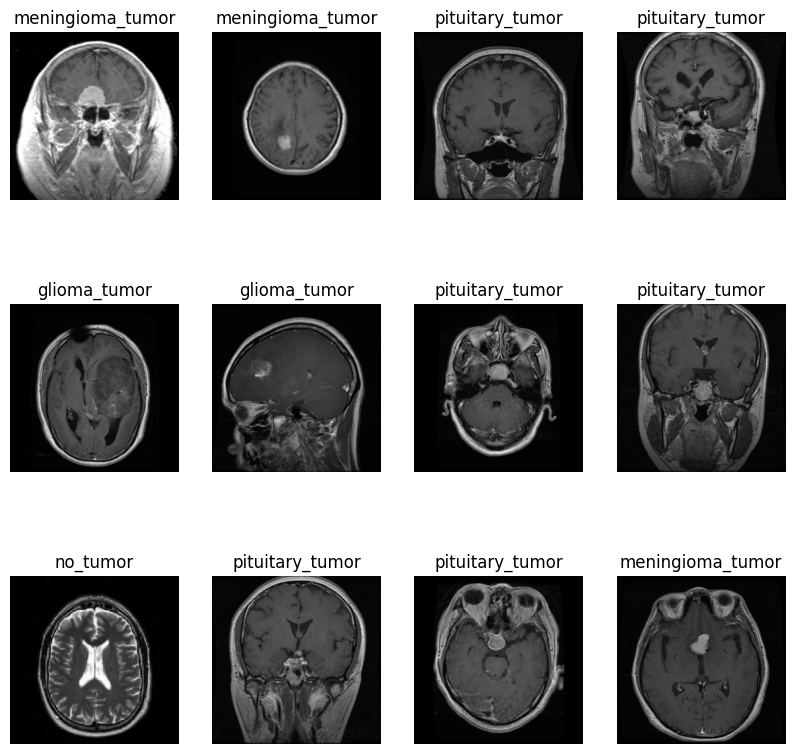

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_df.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [9]:
## Normalise the image dataset
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_df = train_df.map(process)
test_df = test_df.map(process)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [11]:
## implement cnn

model = Sequential()

model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

In [12]:
## compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [13]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [14]:
valid_df = train_df.take(int(0.2 * len(train_df)))

In [15]:
history = model.fit(train_df, validation_data=valid_df, epochs=100,batch_size=BATCH_SIZE ,callbacks=early_stopping)

Epoch 1/100
90/90 [==============================] - 242s 3s/step - loss: 1.1112 - accuracy: 0.4868 - val_loss: 0.7583 - val_accuracy: 0.6962
Epoch 2/100
90/90 [==============================] - 13s 135ms/step - loss: 0.7759 - accuracy: 0.6505 - val_loss: 0.5860 - val_accuracy: 0.7170
Epoch 3/100
90/90 [==============================] - 13s 139ms/step - loss: 0.6116 - accuracy: 0.7293 - val_loss: 0.4127 - val_accuracy: 0.8420
Epoch 4/100
90/90 [==============================] - 15s 160ms/step - loss: 0.4948 - accuracy: 0.7962 - val_loss: 0.3043 - val_accuracy: 0.8576
Epoch 5/100
90/90 [==============================] - 14s 147ms/step - loss: 0.3976 - accuracy: 0.8300 - val_loss: 0.2110 - val_accuracy: 0.9184
Epoch 6/100
90/90 [==============================] - 13s 135ms/step - loss: 0.3393 - accuracy: 0.8603 - val_loss: 0.1692 - val_accuracy: 0.9201
Epoch 7/100
90/90 [==============================] - 13s 134ms/step - loss: 0.3090 - accuracy: 0.8638 - val_loss: 0.1437 - val_accuracy: 0

In [16]:
scores = model.evaluate(test_df)

13/13 [==============================] - 35s 785ms/step - loss: 3.4699 - accuracy: 0.7234


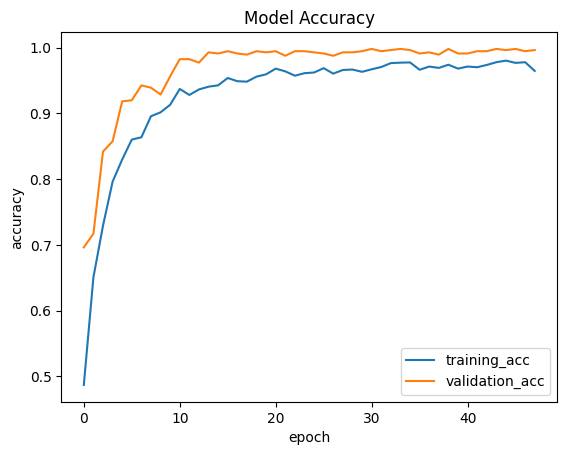

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_acc','validation_acc'])
plt.show()

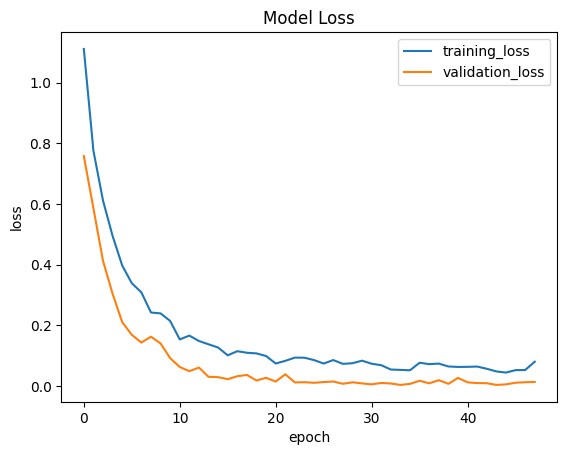

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training_loss','validation_loss'])
plt.show()

In [19]:
model.save('brain_tumor.h5')

The first image to be predicted
The label is glioma_tumor
1/1 [==============================] - 0s 312ms/step
The predicted label is: glioma_tumor


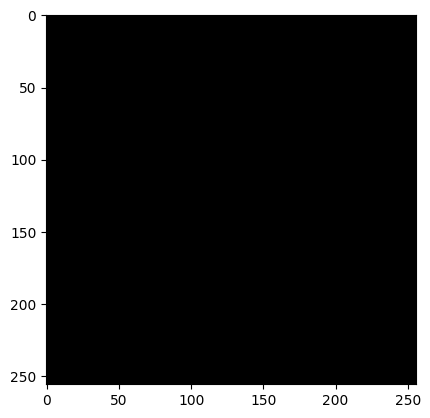

In [20]:
for image_batch, label_batch in test_df.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print('The first image to be predicted')
    print(f'The label is {class_names[first_label]}')
    plt.imshow(first_image)
    batch_prediction=model.predict(image_batch)
    print(f'The predicted label is: {class_names[np.argmax(batch_prediction[0])]}')

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


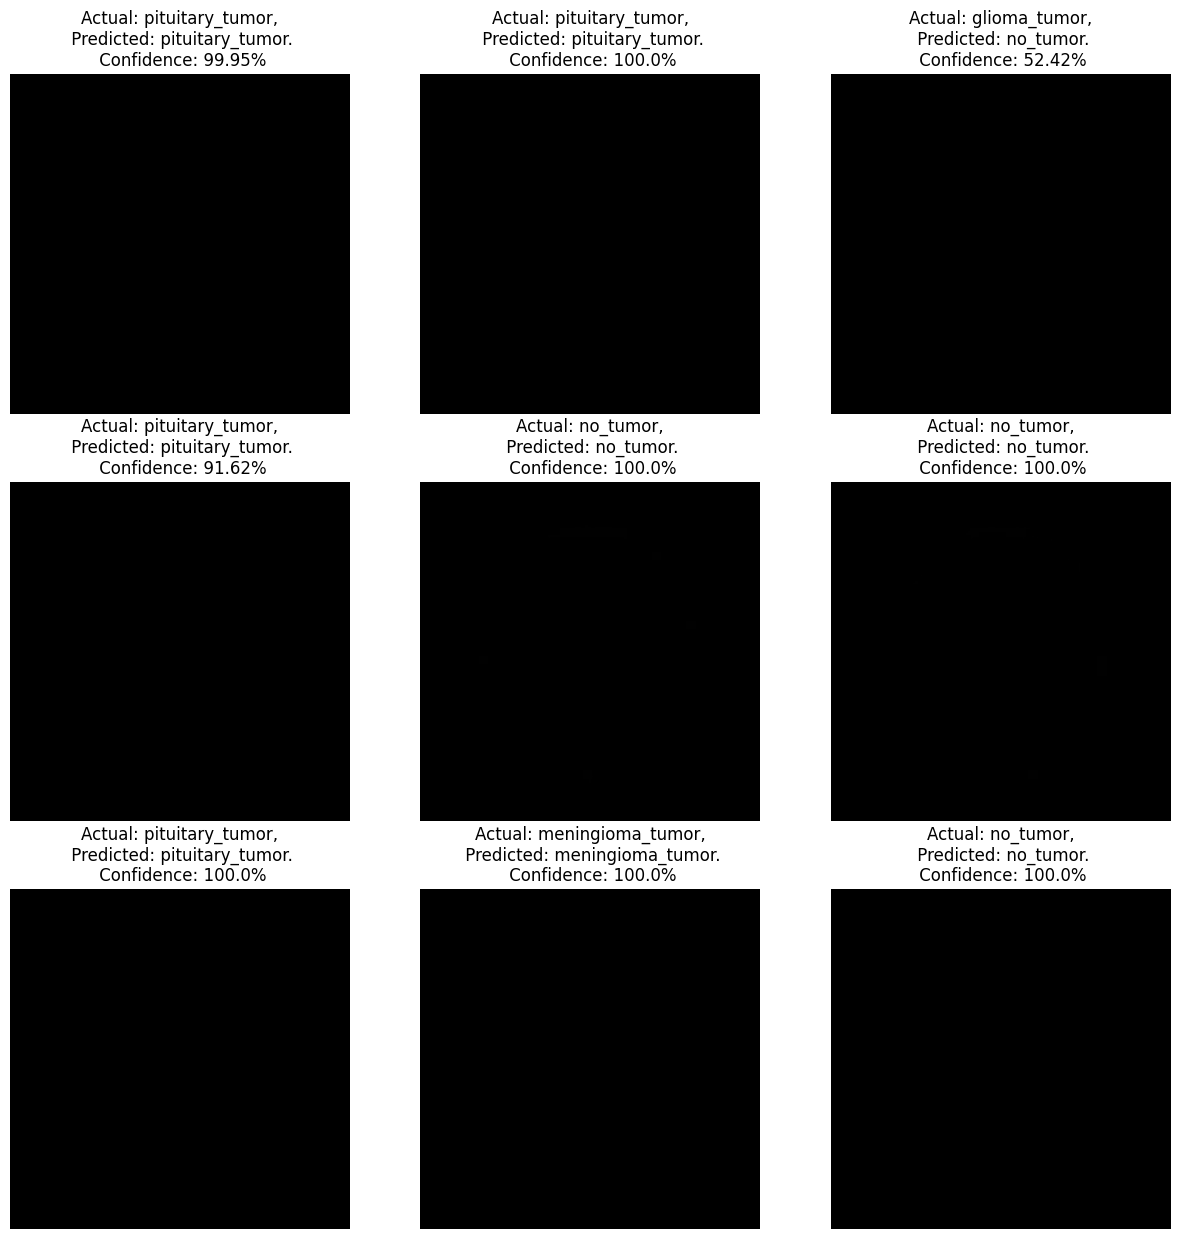

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")